In [102]:
import pandas as pd 
import pip._vendor.requests as requests
import spotipy
import numpy as np
import matplotlib as plt
from spotipy.oauth2 import SpotifyOAuth
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from  sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

scope1 = "user-library-read"
from spotipy.oauth2 import SpotifyClientCredentials
sp =spotipy.Spotify(auth_manager= SpotifyOAuth(client_id = "15fd015d4da742d0bf7da9c6ed3120c7", client_secret = "349c5181636e4e3cbb974b051db425fd", redirect_uri = "http://localhost", scope= scope1))

Happy song analysis

In [78]:
# df_happy1 = pd.read_csv("happy_songs_everyone_knows__.csv")
# df_happy2 = pd.read_csv("jhjh.csv")
# df_happy_total = pd.concat([df_happy1, df_happy2])
# df_happy_total = df_happy_total.drop(["Spotify ID", "Artist IDs", "Track Name", "Album Name", "Artist Name(s)", "Release Date"], axis = 1)
# df_happy_total["tag"] = "happy"
# df_happy_total.describe()
# # df_happy1[["Danceability","Energy","Speechiness","Acousticness", "Instrumentalness", "Liveness","Valence"]].plot.box(figsize = (10, 10))
# # # a = df_happy1.plot.scatter(x = "Popularity", y= "Energy")
# # # a
# # boxplot = df_happy1.boxplot(column =["Popularity","Danceability","Energy","Speechiness","Acousticness","Instrumentalness", "Liveness"])
# # boxplot
# # plt.show()

In [79]:
df_total = pd.read_csv("total.csv")
df_total

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,tag
0,0.746,0.754,1,-6.684,0.0676,0.01520,0.000000,0.0486,0.746,149.882,energ
1,0.628,0.593,8,-5.036,0.0323,0.09300,0.000002,0.0960,0.104,125.026,energ
2,0.620,0.805,5,-5.538,0.0417,0.00564,0.000092,0.2850,0.586,122.062,energ
3,0.504,0.785,8,-4.802,0.1040,0.07380,0.000000,0.2390,0.502,173.968,energ
4,0.560,0.872,3,-4.269,0.1400,0.02390,0.000007,0.3710,0.682,126.050,energ
...,...,...,...,...,...,...,...,...,...,...,...
1496,0.688,0.662,6,-5.570,0.0441,0.09710,0.000001,0.1720,0.549,115.106,happy
1497,0.521,0.877,7,-5.444,0.0683,0.01320,0.080600,0.0929,0.199,180.007,happy
1498,0.287,0.473,5,-3.551,0.0340,0.08580,0.000044,0.3830,0.577,186.283,happy
1499,0.673,0.704,6,-8.056,0.3600,0.19600,0.000000,0.0898,0.372,86.919,happy


In [80]:
df_vibe = pd.read_csv("calm_vibes.csv")
df_vibe

,Spotify ID,Artist IDs,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Added By,Added At,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,0SGBSwX49QWTGiXMu39mUz,3P2GZ3OyREqVPn8YISLrGH,Stillness,Stillness,Fraser Jaspal,2023-03-03,142008,50,spotify:user:,2023-04-03T13:27:55Z,...,2.0,-30.233,1.0,0.0457,0.996,0.950,0.1110,0.5610,75.342,4.0
1,7jUgBIVfc6C2YfFqFmETxz,4Gew7TmeuvKFbHl0PttGaz,Air from Air,Air from Air,Yasuo Zen,2023-03-03,199428,65,spotify:user:,2023-04-03T13:27:55Z,...,6.0,-29.191,1.0,0.0363,0.995,0.942,0.0880,0.4810,68.322,4.0
2,7tPR6ChfHJvkYPK0Zy5zkK,4CqaNfV0FxkPOMcQAiyw71,Us,Life Stories,R. York,2023-01-01,108730,56,spotify:user:,2023-04-03T13:27:55Z,...,7.0,-34.581,1.0,0.0488,0.995,0.950,0.0838,0.0934,43.385,4.0
3,7JuANIIOksqHRFXgE8tEld,2Nk5XPyODZYGkTpGPQel2Q,Lisser,Lisser,Miran,2023-03-03,125041,64,spotify:user:,2023-04-03T13:27:55Z,...,4.0,-27.534,1.0,0.0352,0.984,0.923,0.0820,0.3120,94.597,3.0
4,6rWa5bTCCZQIv0qKekqhnC,2aCjyxAv55DqcgEBYNHS2l,What It Should Look Like,What It Should Look Like,Tom Leaman,2022-07-29,122245,46,spotify:user:,2023-04-03T13:27:55Z,...,7.0,-26.623,1.0,0.0395,0.995,0.954,0.1180,0.4210,107.798,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5WAuzGamm8rl9rY0ZxTZ5h,6xz3TCYDzkXv1a1NtyxdpN,Radiant,Radiant,Carl Faber,2021-05-28,119619,46,spotify:user:,2023-04-03T13:27:55Z,...,0.0,-27.516,1.0,0.0296,0.960,0.940,0.1100,0.3420,80.874,4.0
296,69ZVTxad3rNnwZPwMOk9yX,3owpIJZNZCgXp7WLQJWObU,Tu me donne de la force,Tu me donne de la force,Jonathan Salmon,2021-06-11,136000,49,spotify:user:,2023-04-03T13:27:55Z,...,7.0,-29.454,1.0,0.0396,0.992,0.875,0.1130,0.2140,168.098,4.0
297,322iMyBTTUhTCGRttDs6CY,1Vzm8Hkynchj9tII4nklKk,Tournesol,Tournesol,Edie Chastain,2021-04-09,133719,45,spotify:user:,2023-04-03T13:27:55Z,...,10.0,-30.585,1.0,0.0405,0.994,0.943,0.1100,0.4770,139.099,3.0
298,2z6wyjZZ5hIP7ef5qjW7kW,4QfIvnMPiyUcI6mSTZc1mJ,Wait For Me,Wait For Me,Dawn Well,2021-05-13,120000,54,spotify:user:,2023-04-03T13:27:55Z,...,7.0,-35.436,1.0,0.0291,0.991,0.936,0.0981,0.2520,97.854,4.0


In [81]:
# df_total = df_total[~df_total['Tempo'].isin(df_vibe['Tempo'])]

In [82]:
df_total.loc[df_total["tag"] == "calm", "tag"] = 0
df_total.loc[df_total["tag"] == "happy", "tag"] = 1
df_total.loc[df_total["tag"] == "energ", "tag"] = 2
df_total.loc[df_total["tag"] == "sad", "tag"] = 3

In [83]:
df_total


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,tag
0,0.746,0.754,1,-6.684,0.0676,0.01520,0.000000,0.0486,0.746,149.882,2
1,0.628,0.593,8,-5.036,0.0323,0.09300,0.000002,0.0960,0.104,125.026,2
2,0.620,0.805,5,-5.538,0.0417,0.00564,0.000092,0.2850,0.586,122.062,2
3,0.504,0.785,8,-4.802,0.1040,0.07380,0.000000,0.2390,0.502,173.968,2
4,0.560,0.872,3,-4.269,0.1400,0.02390,0.000007,0.3710,0.682,126.050,2
...,...,...,...,...,...,...,...,...,...,...,...
1496,0.688,0.662,6,-5.570,0.0441,0.09710,0.000001,0.1720,0.549,115.106,1
1497,0.521,0.877,7,-5.444,0.0683,0.01320,0.080600,0.0929,0.199,180.007,1
1498,0.287,0.473,5,-3.551,0.0340,0.08580,0.000044,0.3830,0.577,186.283,1
1499,0.673,0.704,6,-8.056,0.3600,0.19600,0.000000,0.0898,0.372,86.919,1


In [84]:

# Normalize the DataFrame to be between 0 and 1
min_value = df_total[["Tempo"]].min()
max_value = df_total[["Tempo"]].max()
df_total["Tempo"] = (df_total[["Tempo"]] - min_value) / (max_value - min_value)

min_value = df_total[["Loudness"]].min()
max_value = df_total[["Loudness"]].max()
df_total["Loudness"] = (df_total[["Loudness"]] - min_value) / (max_value - min_value)

min_value = df_total[["Key"]].min()
max_value = df_total[["Key"]].max()
df_total["Key"] = (df_total[["Key"]] - min_value) / (max_value - min_value)



In [87]:
data = df_total[["Danceability", "Energy", "Key", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]]

In [88]:
data_target = df_total[["tag"]].astype(int)
data_target.dtypes

tag    int64
dtype: object

In [ ]:
song_x_train, song_x_test, song_y_train, song_y_test = train_test_split(data, data_target, test_size= 0.2, random_state= 42)
df_result = []

for i in range(10):
    glp = GradientBoostingClassifier(n_estimators=170, learning_rate=0.001, max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)
    song_y_train = np.ravel(song_y_train)
    song_y_test = np.ravel(song_y_test)
    glp.fit(song_x_train,song_y_train)
    song_y_predict = glp.predict(song_x_test)
    output = {"RMSE": np.sqrt(mean_squared_error(song_y_test,song_y_predict)), "accuracy_score":metrics.accuracy_score(song_y_test, song_y_predict)}
    df_result.append(output)
        # print("RMSE", np.sqrt(mean_squared_error(song_y_test,song_y_predict)))
        # print(metrics.accuracy_score(song_y_test, song_y_predict))
        # print("------")
df_output = pd.DataFrame(df_result)
df_output

In [167]:
song_x_train, song_x_test, song_y_train, song_y_test = train_test_split(data, data_target, test_size= 0.2, random_state= 42)
df_result = []

for i in range(1):
    model = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes= (16, 10,), activation= "logistic",max_iter= 1000, learning_rate_init= 0.01, alpha = 0.01), n_jobs = -1)
    song_y_train = np.ravel(song_y_train)
    song_y_test = np.ravel(song_y_test)
    model.fit(song_x_train,song_y_train)
    song_y_predict = model.predict(song_x_test)
    output = {"RMSE": np.sqrt(mean_squared_error(song_y_test,song_y_predict)), "accuracy_score":metrics.accuracy_score(song_y_test, song_y_predict)}
    df_result.append(output)
        # print("RMSE", np.sqrt(mean_squared_error(song_y_test,song_y_predict)))
        # print(metrics.accuracy_score(song_y_test, song_y_predict))
        # print("------")
df_output = pd.DataFrame(df_result)
df_output

,RMSE,accuracy_score
0,1.003317,0.694352


In [93]:
# song_x_train, song_x_test, song_y_train, song_y_test = train_test_split(data, data_target, test_size= 0.2, random_state= 42)
# df_result = []


# param_grid = {
#     'hidden_layer_sizes': [(50,), (50,), (100, 100), (16, 16)],
#     'activation': ['logistic'],
#     'learning_rate_init': [0.001, 0.01, 0.1]
# }
# for i in range(5):
#     model = MLPClassifier(max_iter= 2000)
#     grid_search = GridSearchCV(model, param_grid, cv=5)

#     song_y_train = np.ravel(song_y_train)
#     song_y_test = np.ravel(song_y_test)
#     grid_search.fit(song_x_train,song_y_train)
#     song_y_predict = grid_search.predict(song_x_test)
#     output = {"RMSE": np.sqrt(mean_squared_error(song_y_test,song_y_predict)), "accuracy_score":metrics.accuracy_score(song_y_test, song_y_predict)}
#     df_result.append(output)
#         # print("RMSE", np.sqrt(mean_squared_error(song_y_test,song_y_predict)))
#         # print(metrics.accuracy_score(song_y_test, song_y_predict))
#         # print("------")
# df_output = pd.DataFrame(df_result)
# df_output

(array([ 4.47625896,  4.47625896,  4.47625896,  4.47625896,  8.95251792,
         4.47625896,  4.47625896, 17.90503585, 17.90503585, 13.42877688,
         0.        ,  4.47625896,  8.95251792,  8.95251792, 13.42877688,
         8.95251792, 31.33381273, 26.85755377, 31.33381273, 35.81007169,
        26.85755377, 31.33381273, 31.33381273, 40.28633065, 44.76258961,
        26.85755377, 35.81007169, 44.76258961, 31.33381273, 26.85755377,
        31.33381273, 31.33381273, 35.81007169, 22.38129481, 31.33381273,
         8.95251792, 17.90503585, 35.81007169, 13.42877688, 22.38129481,
         4.47625896,  4.47625896,  4.47625896, 17.90503585,  0.        ,
         4.47625896,  0.        ,  4.47625896,  0.        ,  8.95251792]),
 array([0.67197678, 0.67309378, 0.67421079, 0.67532779, 0.6764448 ,
        0.6775618 , 0.6786788 , 0.67979581, 0.68091281, 0.68202982,
        0.68314682, 0.68426383, 0.68538083, 0.68649783, 0.68761484,
        0.68873184, 0.68984885, 0.69096585, 0.69208286, 0.693199

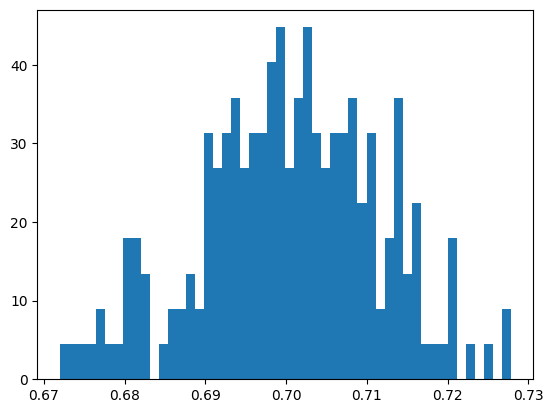

In [165]:
mean = df_output["accuracy_score"].mean()
std = df_output["accuracy_score"].std()
normal = np.random.normal(mean, std, size = len(df_output))
plt.hist(normal, bins = 50, density= True)

(array([ 1.16460394,  0.        ,  1.16460394,  1.16460394,  3.49381183,
         3.49381183,  6.98762366,  5.82301972,  8.15222761,  2.32920789,
        12.81064339, 11.64603944, 13.97524733, 12.81064339, 18.63366311,
        11.64603944, 20.96287099, 12.81064339, 11.64603944, 12.81064339,
        20.96287099,  9.31683155,  6.98762366,  6.98762366,  5.82301972,
         4.65841578,  1.16460394,  1.16460394,  0.        ,  2.32920789]),
 array([0.93723874, 0.94153205, 0.94582535, 0.95011866, 0.95441196,
        0.95870527, 0.96299857, 0.96729188, 0.97158518, 0.97587849,
        0.98017179, 0.9844651 , 0.9887584 , 0.99305171, 0.99734501,
        1.00163832, 1.00593163, 1.01022493, 1.01451824, 1.01881154,
        1.02310485, 1.02739815, 1.03169146, 1.03598476, 1.04027807,
        1.04457137, 1.04886468, 1.05315798, 1.05745129, 1.06174459,
        1.0660379 ]),
 <BarContainer object of 30 artists>)

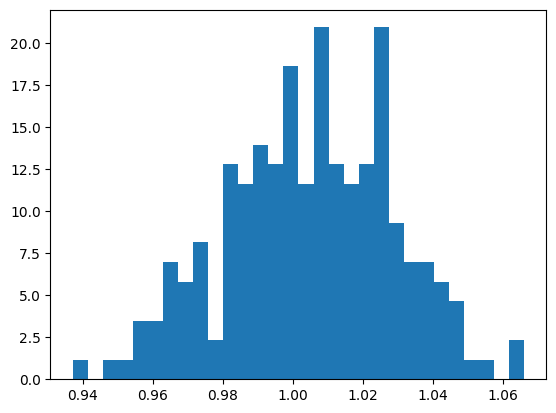

In [166]:
mean = df_output["RMSE"].mean()
std = df_output["RMSE"].std()
normal = np.random.normal(mean, std, size = len(df_output))
plt.hist(normal, bins = 30, density= True)